# Fashion MNIST 손글씨 - CNN v2



- 2 x conv2D layers with padding
- 1 FCN layer
- 1 Dropput
- MaxPooling2D
- l output layer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [8]:
model_path = 'best_fashion_mnist_cnn_v1.h5'
mc = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

In [9]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [10]:
hist1 = model.fit(X_train, Y_train, validation_split=0.2,
                  epochs=1000, batch_size=200, verbose=0,
                  callbacks=[mc, es])


Epoch 1: val_loss improved from inf to 0.32836, saving model to best_fashion_mnist_cnn_v1.h5

Epoch 2: val_loss improved from 0.32836 to 0.27353, saving model to best_fashion_mnist_cnn_v1.h5

Epoch 3: val_loss improved from 0.27353 to 0.23827, saving model to best_fashion_mnist_cnn_v1.h5

Epoch 4: val_loss improved from 0.23827 to 0.22817, saving model to best_fashion_mnist_cnn_v1.h5

Epoch 5: val_loss did not improve from 0.22817

Epoch 6: val_loss improved from 0.22817 to 0.20991, saving model to best_fashion_mnist_cnn_v1.h5

Epoch 7: val_loss improved from 0.20991 to 0.20642, saving model to best_fashion_mnist_cnn_v1.h5

Epoch 8: val_loss improved from 0.20642 to 0.20367, saving model to best_fashion_mnist_cnn_v1.h5

Epoch 9: val_loss did not improve from 0.20367

Epoch 10: val_loss did not improve from 0.20367

Epoch 11: val_loss did not improve from 0.20367

Epoch 12: val_loss did not improve from 0.20367

Epoch 13: val_loss did not improve from 0.20367

Epoch 14: val_loss did no

In [11]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2191 - accuracy: 0.9221


[0.2190748006105423, 0.9221000075340271]

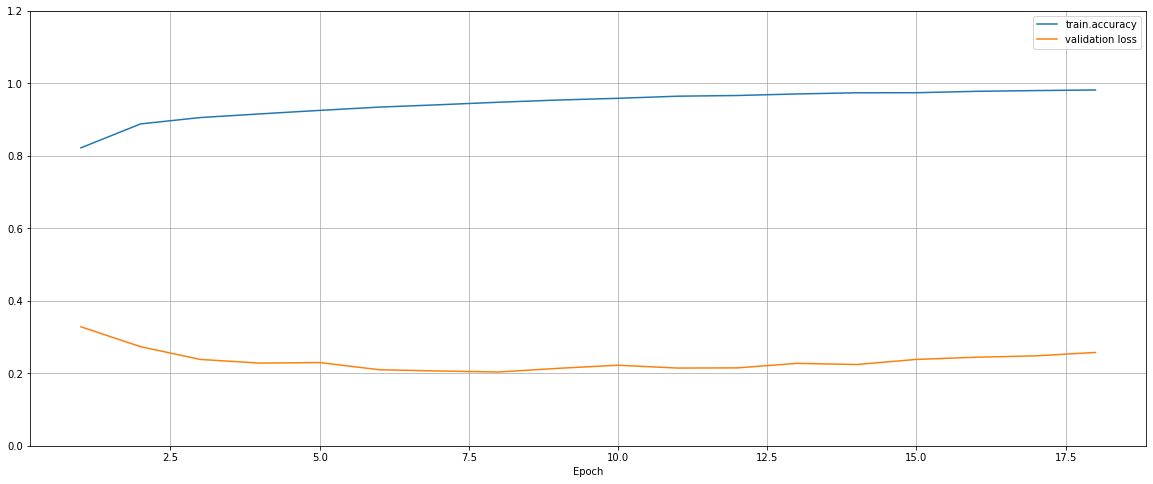

In [12]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()

### 개, 고양이 분류(partial) - CNN v1
- 

In [13]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


--2022-10-17 00:23:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.208, 142.251.45.112, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   177MB/s    in 0.4s    

2022-10-17 00:23:04 (177 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [14]:
!unzip cats_and_dogs_filtered.zip > /dev/null

In [16]:
from PIL import Image
import cv2

In [17]:
IMAGE_SIZE = 150

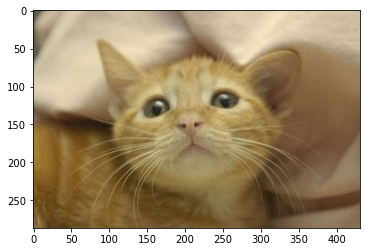

In [18]:
fname = 'cats_and_dogs_filtered/train/cats/cat.475.jpg'
img = cv2.imread(fname)[:, :, ::-1]
plt.imshow(img)

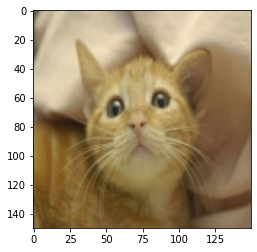

In [19]:
plt.imshow(cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_AREA))

In [20]:
h, w, _ = img.shape
h, w

(287, 431)

In [21]:
if h> w :
    width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
else :
    width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE

In [22]:
new_img = cv2.resize(img, dsize = (width, height), interpolation=cv2.INTER_AREA)
new_img.shape

(150, 225, 3)

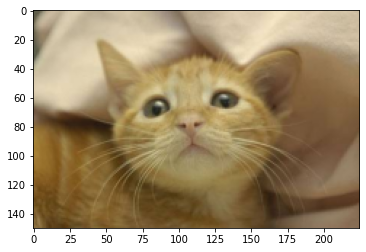

In [23]:
plt.imshow(new_img)

In [24]:
diff = abs(width-height) // 2

In [25]:
if h > w :
    final_img = new_img[diff : diff+IMAGE_SIZE, :]
else :
    final_img = new_img[:, diff : diff + IMAGE_SIZE]

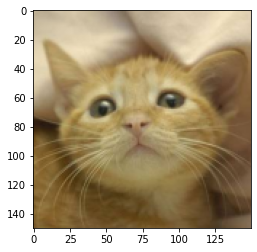

In [27]:
plt.imshow(final_img)

In [28]:
def center_image(img, src_format='OpenCV', dst_format='OpenCV'):
    if src_format == 'OpenCV':
        h, w = img.shape[:-1]
    else :                        # Pillow
        h, w, _ = np.array(img).shape

    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else :
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE  


    interpolation = cv2.INTER_AREA if h + w > 300 else cv2.INTER_CUBIC
    new_img = cv2.resize(img, dsize=(width, height), interpolation=interpolation)

    diff = abs(width-height) // 2
    if h > w:
        final_img = new_img[diff:diff + IMAGE_SIZE, :]
    else :
        final_img = new_img[:, diff:diff + IMAGE_SIZE]
    return final_img if dst_format == 'OpenCV' else Image.fromarray(final_img)

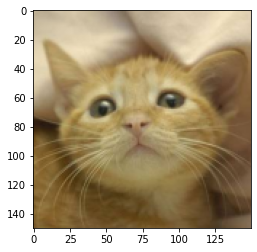

In [29]:
img = cv2.imread(fname)[:, :, ::-1]
plt.imshow(center_image(img))

In [30]:
import os

In [31]:
CENTER_DIR = 'cats_and_dogs_centered'
train_dir = f'{CENTER_DIR}/train'
validation_dir = f'{CENTER_DIR}/validation'
train_cats_dir = f'{CENTER_DIR}/train/cats'
train_dogs_dir = f'{CENTER_DIR}/train/dogs'
validation_cats_dir = f'{CENTER_DIR}/validation/cats'
validation_dogs_dir = f'{CENTER_DIR}/validation/dogs'

In [32]:
if not os.path.exists(CENTER_DIR):
    os.mkdir(CENTER_DIR)
for dir in [train_dir,validation_dir,train_cats_dir,train_dogs_dir,validation_cats_dir,validation_dogs_dir]:
    os.mkdir(dir)

In [33]:
old_train_cats_dir = 'cats_and_dogs_filtered/train/cats'
old_train_dogs_dir = 'cats_and_dogs_filtered/train/dogs'
old_validation_cats_dir = 'cats_and_dogs_filtered/validation/cats'
old_validation_dogs_dir = 'cats_and_dogs_filtered/validation/dogs'

In [39]:
# cats_and_dogs_filtered -> image 축소 / 확대 후 centering -> cats_and_dogs_centered
from glob import glob

for src_dir in [old_train_cats_dir, old_train_dogs_dir, old_validation_cats_dir, old_validation_dogs_dir]:
    # dst_dir = src_dir.split('/')[1:]
    # dst_dir = '/'.join([CENTER_DIR] + dst_dir)
    dst_dir = src_dir.replace('filtered', 'centered')
    for fname in glob(f'{src_dir}/*.jpg'):
        dst_fname = fname.split('/')[-1]
        src_img = cv2.imread(fname)[:, :, ::-1]
        dst_img = center_image(src_img, src_format='Pillow', dst_format='Pillow')
        dst_img.save(f'{dst_dir}/{dst_fname}')

In [43]:
dst_img.size

(150, 150)

In [56]:
del model

In [57]:
model = Sequential([
    Conv2D(16, (3,3), input_shape = (150, 150, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [58]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer = RMSprop(learning_rate = 1e-3, decay=1e-8),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [59]:
model_path = 'best_cats_and_dogs_v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [61]:
train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode='binary', target_size=(150, 150)
)

test_generator = test_datagen.flow_from_directory(
    validation_dir, batch_size=20, class_mode='binary', target_size=(150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [62]:
hist = model.fit(
    train_generator, 
    validation_data=test_generator,
    epochs=100, steps_per_epoch=100,
    validation_steps=50, callbacks=[mc, es]
)

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.8089 - accuracy: 0.5520
Epoch 1: val_loss improved from inf to 0.70878, saving model to best_cats_and_dogs_v1.h5
100/100 [==============================] - 5s 39ms/step - loss: 0.8089 - accuracy: 0.5520 - val_loss: 0.7088 - val_accuracy: 0.5040
Epoch 2/100
 98/100 [============================>.] - ETA: 0s - loss: 0.6741 - accuracy: 0.6219
Epoch 2: val_loss improved from 0.70878 to 0.64308, saving model to best_cats_and_dogs_v1.h5
100/100 [==============================] - 4s 38ms/step - loss: 0.6728 - accuracy: 0.6225 - val_loss: 0.6431 - val_accuracy: 0.6290
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 0.6055 - accuracy: 0.6904
Epoch 3: val_loss improved from 0.64308 to 0.63377, saving model to best_cats_and_dogs_v1.h5
100/100 [==============================] - 4s 38ms/step - loss: 0.6078 - accuracy: 0.6865 - val_loss: 0.6338 - val_accuracy: 0.6550
Epoch 4/100
100/100 [=================

# cifar-10 이미지 분류

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [64]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [66]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

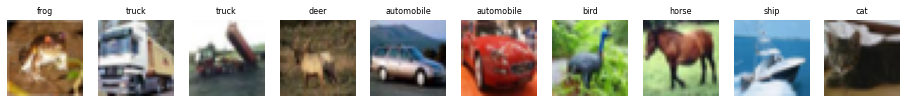

In [68]:
plt.figure(figsize=(16,4))
for i in range(10) :
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i,0]], fontsize=8)
plt.show()

In [69]:
X_train = X_train / 255. 
X_test = X_test / 255.

In [71]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

In [72]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [91]:
del model

In [92]:
model = Sequential([
    Conv2D(32, (3,3), input_shape = X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [93]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [94]:
model_path = 'best-cifar10-v1.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

In [79]:
hist = model.fit(X_train, Y_train, validation_split = 0.2,
                 epochs=1000, batch_size=32, verbose=0,
                 callbacks=[mc, es])


Epoch 1: val_loss improved from inf to 1.21881, saving model to best-cifar10-v1.h5

Epoch 2: val_loss improved from 1.21881 to 1.05077, saving model to best-cifar10-v1.h5

Epoch 3: val_loss improved from 1.05077 to 0.87060, saving model to best-cifar10-v1.h5

Epoch 4: val_loss improved from 0.87060 to 0.82284, saving model to best-cifar10-v1.h5

Epoch 5: val_loss improved from 0.82284 to 0.76966, saving model to best-cifar10-v1.h5

Epoch 6: val_loss improved from 0.76966 to 0.72845, saving model to best-cifar10-v1.h5

Epoch 7: val_loss improved from 0.72845 to 0.70420, saving model to best-cifar10-v1.h5

Epoch 8: val_loss did not improve from 0.70420

Epoch 9: val_loss improved from 0.70420 to 0.69973, saving model to best-cifar10-v1.h5

Epoch 10: val_loss improved from 0.69973 to 0.68813, saving model to best-cifar10-v1.h5

Epoch 11: val_loss improved from 0.68813 to 0.65926, saving model to best-cifar10-v1.h5

Epoch 12: val_loss did not improve from 0.65926

Epoch 13: val_loss impro

In [80]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6704 - accuracy: 0.7737


[0.6703693270683289, 0.7736999988555908]

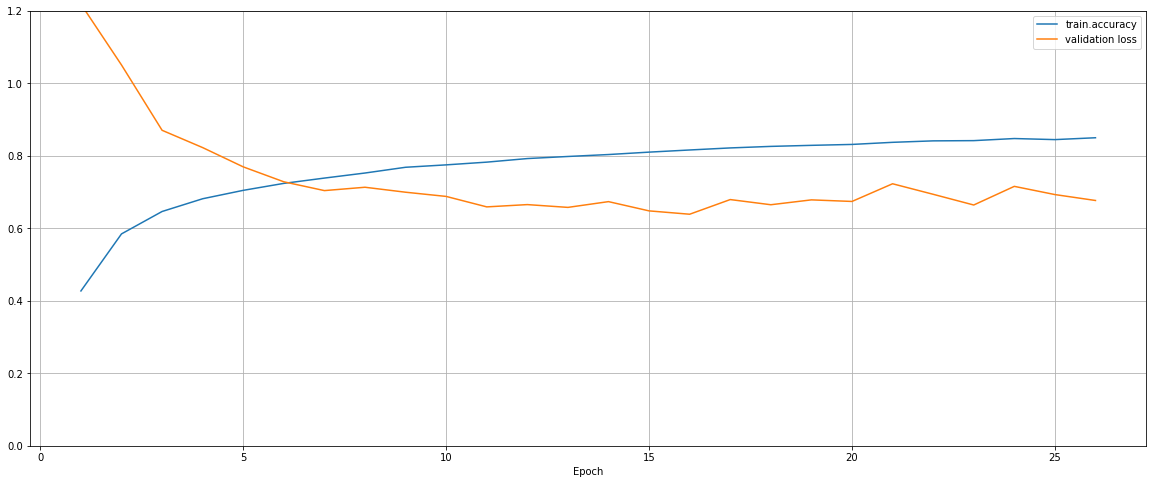

In [81]:
y_acc1 = hist.history['accuracy']
y_vloss1 = hist.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()

# 데이터 부풀리기 

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2,
    random_state=seed
)

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 10,         # randomly rotate images in the range (deg 0 to 180) width_shift_range=0.1, 
    width_shift_range = 0.1,     # randomly shift images horizontally height_shift_range=0.1, 
    height_shift_range = 0.1,    # randomly shift images vertically
    shear_range = 0.1,           # 도형의 기울기
    zoom_range= [0.8, 1.2],      # set range for random zoom
    horizontal_flip=True,        # randomly flip images 
    vertical_flip=False,         # randomly flip images
    fill_mode='nearest',         # set mode for filling points outside the input boundaries
)

In [86]:
datagen.fit(X_train)

In [95]:
hist = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data = (X_valid, Y_valid),
    epochs=100, batch_size=32,
    callbacks = [mc, es]
)

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 1.6964 - accuracy: 0.3752
Epoch 1: val_loss improved from inf to 1.37519, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 27s 21ms/step - loss: 1.6964 - accuracy: 0.3752 - val_loss: 1.3752 - val_accuracy: 0.4873
Epoch 2/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.3929 - accuracy: 0.4979
Epoch 2: val_loss improved from 1.37519 to 1.12100, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 27s 21ms/step - loss: 1.3931 - accuracy: 0.4979 - val_loss: 1.1210 - val_accuracy: 0.5974
Epoch 3/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.2617 - accuracy: 0.5465
Epoch 3: val_loss did not improve from 1.12100
1250/1250 [==============================] - 27s 22ms/step - loss: 1.2615 - accuracy: 0.5466 - val_loss: 1.2670 - val_accuracy: 0.5522
Epoch 4/100
1248/1250 [============================>.] - ETA: 0s - loss: 1.1751 -

In [96]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7071 - accuracy: 0.7598


[0.7071402668952942, 0.7598000168800354]

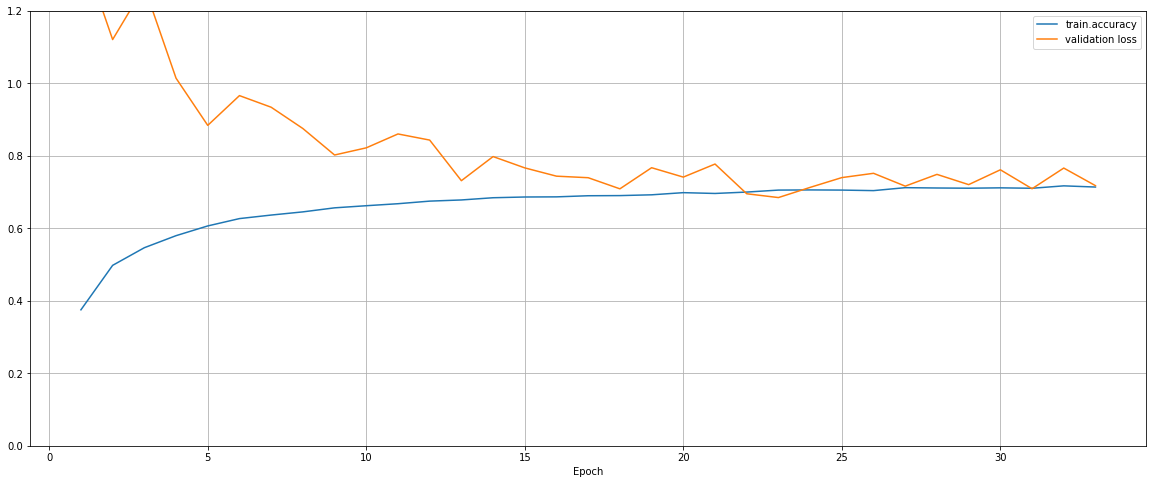

In [97]:
y_acc1 = hist.history['accuracy']
y_vloss1 = hist.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()

#21_spam_RNN

In [98]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv'

In [99]:
df = pd.read_csv(url, encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [100]:
df = df[['v1', 'v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [102]:
import numpy as np
df.shape, df.v2.nunique()

((5572, 2), 5169)

In [103]:
df.drop_duplicates(subset=['v2'], inplace=True)

In [104]:
df.shape , df.v2.nunique()

((5169, 2), 5169)

In [105]:
df.v1 = df.v1.replace(['ham', 'spam'], [0, 1])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
df.v1.value_counts()

0    4516
1     653
Name: v1, dtype: int64

In [107]:
x, y = df.v2.values, df.v1.values
x.shape, y.shape

((5169,), (5169,))

In [108]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [111]:
import re
def preprocessing(s):
    s = s.encode('utf8').decode('ascii', 'ignore')
    s = re.sub('[^a-z0-9 ]', '', s.lower())
    return s

In [114]:
X_data = [preprocessing(sent) for sent in x]
X_data[2]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'

In [115]:
t = Tokenizer()
t.fit_on_texts(X_data)

In [116]:
vocab_size = len(t.word_index) + 1
vocab_size

9479

In [117]:
print(t.texts_to_sequences(X_data)[2])

[54, 508, 8, 22, 4, 959, 960, 2, 217, 2566, 1291, 664, 2567, 2568, 268, 2569, 71, 2566, 2, 2570, 2, 336, 508, 3839, 84, 3840, 424, 3841]


In [118]:
sequences = []
for line in X_data:
    encoded = t.texts_to_sequences([line])[0]
    sequences.append(encoded)
sequences[:15]

[[43,
  410,
  3837,
  729,
  663,
  699,
  65,
  8,
  1138,
  93,
  118,
  459,
  1139,
  146,
  2565,
  1140,
  68,
  56,
  3838,
  133],
 [51, 281, 1290, 411, 6, 1666],
 [54,
  508,
  8,
  22,
  4,
  959,
  960,
  2,
  217,
  2566,
  1291,
  664,
  2567,
  2568,
  268,
  2569,
  71,
  2566,
  2,
  2570,
  2,
  336,
  508,
  3839,
  84,
  3840,
  424,
  3841],
 [6, 211, 144, 24, 325, 2571, 6, 159, 135, 58, 144],
 [885, 1, 44, 88, 70, 425, 2, 833, 70, 1667, 188, 103, 426],
 [774,
  107,
  68,
  1449,
  42,
  100,
  182,
  579,
  23,
  7,
  40,
  362,
  82,
  363,
  57,
  105,
  364,
  3,
  41,
  12,
  14,
  83,
  1668,
  51,
  345,
  1292,
  3842,
  2,
  72,
  365,
  2,
  2572],
 [207, 11, 596, 9, 26, 57, 2, 366, 34, 10, 104, 629, 10, 57, 3843, 3844],
 [78,
  229,
  13,
  1450,
  2573,
  2573,
  2574,
  3845,
  3846,
  3847,
  119,
  100,
  597,
  78,
  13,
  1669,
  12,
  52,
  2575,
  1293,
  526,
  2,
  1294,
  13,
  248,
  1669],
 [730,
  78,
  4,
  961,
  427,
  240,
  3,
  16,
 

In [119]:
len(sequences)

5169

In [120]:
max_len = max(len(seq) for seq in sequences)
max_len

171

In [123]:
data = pad_sequences(sequences, maxlen = max_len)

In [124]:
data[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [125]:
data.shape, y.shape

((5169, 171), (5169,))

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, y, stratify=y, test_size=0.2
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 171), (1034, 171), (4135,), (1034,))

In [127]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [129]:
 model = Sequential([
     Embedding(vocab_size, 32, input_length = max_len),
     GRU(32),
     Dense(1, activation='sigmoid')
 ])
 model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 171, 32)           303328    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 309,697
Trainable params: 309,697
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [131]:
model_path = 'best-spam-rnn.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

In [132]:
hist1 = model.fit(X_train, y_train, validation_split=0.2, 
    epochs=200, batch_size=64, 
    verbose = 1,
    callbacks = [mc, es])

Epoch 1/200
50/52 [===========================>..] - ETA: 0s - loss: 0.4617 - accuracy: 0.8653
Epoch 1: val_loss improved from inf to 0.25877, saving model to best-spam-rnn.h5
52/52 [==============================] - 4s 21ms/step - loss: 0.4540 - accuracy: 0.8667 - val_loss: 0.2588 - val_accuracy: 0.8730
Epoch 2/200
51/52 [============================>.] - ETA: 0s - loss: 0.1613 - accuracy: 0.9249
Epoch 2: val_loss improved from 0.25877 to 0.08504, saving model to best-spam-rnn.h5
52/52 [==============================] - 1s 12ms/step - loss: 0.1599 - accuracy: 0.9256 - val_loss: 0.0850 - val_accuracy: 0.9746
Epoch 3/200
48/52 [==========================>...] - ETA: 0s - loss: 0.0548 - accuracy: 0.9847
Epoch 3: val_loss improved from 0.08504 to 0.04866, saving model to best-spam-rnn.h5
52/52 [==============================] - 1s 11ms/step - loss: 0.0527 - accuracy: 0.9852 - val_loss: 0.0487 - val_accuracy: 0.9843
Epoch 4/200
47/52 [==========================>...] - ETA: 0s - loss: 0.024

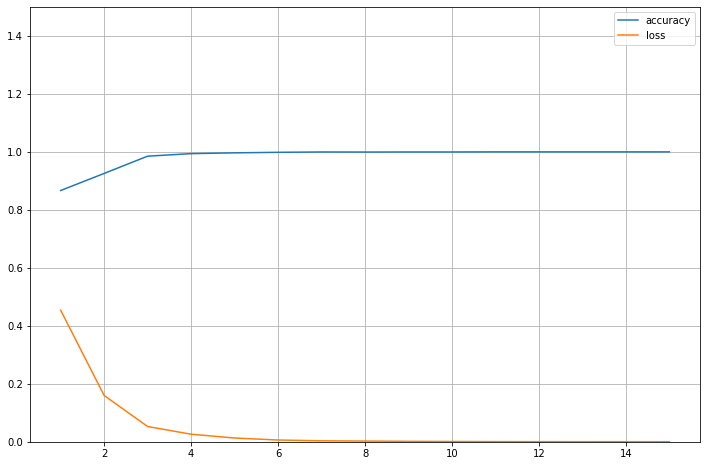

In [133]:
y_acc = hist1.history['accuracy']
y_loss = hist1.history['loss']
xs = np.arange(1, len(y_acc) + 1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()

# 로이스터 뉴스 분류하기

In [134]:
from tensorflow.keras.datasets import reuters

In [136]:
(X_train, y_train), (X_test, y_test) = reuters.load_data()
X_train.shape, X_test.shape

((8982,), (2246,))

In [137]:
X_train[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [138]:
# 카테고리 개수
max(y_train) + 1

46

In [140]:
reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [141]:
reuters.get_word_index().items()

dict_items([('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997), ('hermann', 8804), ('passsengers', 20676), ('stipulate', 20677), ('heublein', 8352), ('screaming', 20713), ('tcby', 16261), ('four', 185), ('grains', 1642), ('broiler', 20680), ('wooden', 12090), ('wednesday', 1220), ('highveld', 13797), ('duffour', 7593), ('0053', 20681), ('elections', 3914), ('270', 2563), ('271', 3551), ('272', 5113), ('273', 3552), ('274', 3400), ('rudman', 7975), ('276', 3401), ('277', 3478), ('278', 3632), ('279', 4309), ('dormancy', 9381), ('errors', 7247), ('deferred', 3086), ('sptnd', 20683), ('cooking', 8805), ('stratabit', 20684), ('designing', 16262), ('metalurgicos', 20685), ('databank', 13798), ('300er', 20686), ('shocks', 20687), ('nawg', 7972), ('tnta', 20688), ('perforations', 20689), ('affiliates', 2891), ('27p', 20690), ('ching', 16263), ('china', 595), ('wagyu', 

In [142]:
index_word = {}
for key, value in reuters.get_word_index().items():
    index_word[value] = key
index_word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [143]:
' '.join(index_word[index] for index in X_train[0])

'the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [146]:
max(len(s) for s in X_train), sum(map(len, X_train)) / len(X_train)

(2376, 145.5398574927633)

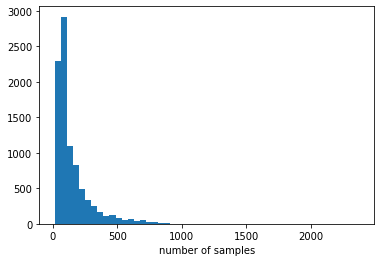

In [147]:
import matplotlib.pyplot as plt
plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('length of samples')
plt.xlabel('number of samples')
plt.show()

In [148]:
max_words = 1000
max_len = 100

In [161]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words = max_words, test_split=0.2
)

In [162]:
y_train[0]

3

In [163]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [165]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len) 
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8982, 100), (2246, 100), (8982, 46), (2246, 46))

In [168]:
del model

In [169]:
model = Sequential([
    Embedding(max_words, 64, input_length= max_len),
    LSTM(128),
    Dense(46, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           64000     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense_12 (Dense)            (None, 46)                5934      
                                                                 
Total params: 168,750
Trainable params: 168,750
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [171]:
model_path = 'best-spam-lstm.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

In [172]:
hist1 = model.fit(X_train, Y_train, validation_split=0.2, 
    epochs=2000, batch_size=128, 
    verbose = 1,
    callbacks = [mc, es])

Epoch 1/2000
57/57 [==============================] - ETA: 0s - loss: 2.6956 - accuracy: 0.3473
Epoch 1: val_loss improved from inf to 2.40976, saving model to best-spam-lstm.h5
57/57 [==============================] - 3s 22ms/step - loss: 2.6956 - accuracy: 0.3473 - val_loss: 2.4098 - val_accuracy: 0.3450
Epoch 2/2000
55/57 [===========================>..] - ETA: 0s - loss: 2.3795 - accuracy: 0.3595
Epoch 2: val_loss improved from 2.40976 to 2.22277, saving model to best-spam-lstm.h5
57/57 [==============================] - 1s 12ms/step - loss: 2.3714 - accuracy: 0.3628 - val_loss: 2.2228 - val_accuracy: 0.4413
Epoch 3/2000
57/57 [==============================] - ETA: 0s - loss: 2.4374 - accuracy: 0.3346
Epoch 3: val_loss did not improve from 2.22277
57/57 [==============================] - 1s 11ms/step - loss: 2.4374 - accuracy: 0.3346 - val_loss: 2.3485 - val_accuracy: 0.3450
Epoch 4/2000
54/57 [===========================>..] - ETA: 0s - loss: 2.1652 - accuracy: 0.4470
Epoch 4: va

In [173]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

71/71 [==============================] - 1s 5ms/step - loss: 1.2550 - accuracy: 0.7093


[1.2549735307693481, 0.709260880947113]

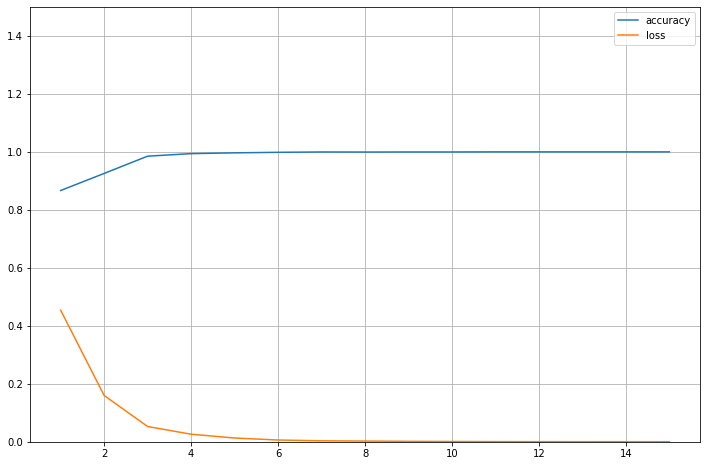

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()

### IMDB 영화리뷰 감성분석 - LSTM

In [176]:
from tensorflow.keras.datasets import imdb
(X_train, y_train) , (X_test, y_test) = imdb.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

17464789/17464789 [==============================] - 0s 0us/step


((25000,), (25000,), (25000,), (25000,))

In [177]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [178]:
# 리뷰 최대 길이, 평균 길이
max(len(s) for s in X_train) , sum(map(len, X_train)) / len(X_train)

(2494, 238.71364)

### LSTM으로 감성 분석
- 단어 빈도수 : 10,000 (총 88,584)
- 리뷰 단어수 : 500(최대 2494)
- 최대 데이터 갯수 => 나중에 해보기!
    - train : 25000, valid: 10000, test: 15000
- 수업시간 :
    - train: 20000, test: 5000(valid:20%)

In [179]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [180]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [181]:
num_words = 10000
(X_train, y_train), (_, _) = imdb.load_data(num_words = 10000)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.2,
    random_state = seed
)

In [183]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000,), (5000,), (20000,), (5000,))

In [184]:
max_len = 500
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

X_train.shape, X_test.shape

((20000, 500), (5000, 500))

In [185]:
del model

In [186]:
model = Sequential([
    Embedding(num_words, 128, input_length = max_len),
    LSTM(256),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 256)               394240    
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,674,497
Trainable params: 1,674,497
Non-trainable params: 0
_________________________________________________________________


In [187]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [188]:
model_path = 'best-imdb_lstm.h5'
mc = ModelCheckpoint(model_path, verbose=1, best_save_only = True)
es = EarlyStopping(patience=5)

In [189]:
hist1 = model.fit(X_train, y_train, validation_split = 0.2,
          epochs = 100, batch_size = 64, 
          callbacks=[mc, es])

Epoch 1/100
250/250 [==============================] - ETA: 0s - loss: 0.5519 - accuracy: 0.7169
Epoch 1: saving model to best-imdb_lstm.h5
250/250 [==============================] - 14s 51ms/step - loss: 0.5519 - accuracy: 0.7169 - val_loss: 0.4196 - val_accuracy: 0.8250
Epoch 2/100
249/250 [============================>.] - ETA: 0s - loss: 0.3216 - accuracy: 0.8690
Epoch 2: saving model to best-imdb_lstm.h5
250/250 [==============================] - 11s 46ms/step - loss: 0.3221 - accuracy: 0.8687 - val_loss: 0.4113 - val_accuracy: 0.8092
Epoch 3/100
249/250 [============================>.] - ETA: 0s - loss: 0.2337 - accuracy: 0.9101
Epoch 3: saving model to best-imdb_lstm.h5
250/250 [==============================] - 12s 48ms/step - loss: 0.2334 - accuracy: 0.9102 - val_loss: 0.3474 - val_accuracy: 0.8587
Epoch 4/100
249/250 [============================>.] - ETA: 0s - loss: 0.1476 - accuracy: 0.9466
Epoch 4: saving model to best-imdb_lstm.h5
250/250 [==============================] 

In [190]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

157/157 [==============================] - 3s 16ms/step - loss: 0.6680 - accuracy: 0.8492


[0.668025016784668, 0.8492000102996826]

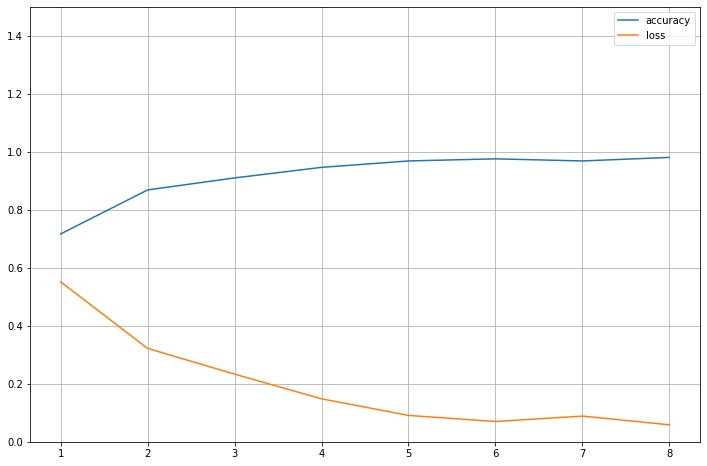

In [191]:
y_acc = hist1.history['accuracy']
y_loss = hist1.history['loss']
xs = np.arange(1, len(y_acc) + 1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()

In [198]:
from tensorflow.keras.layers import Conv1D, MaxPool1D

In [199]:
del model2

NameError: ignored

In [200]:
model2 = Sequential([
    Embedding(num_words, 100, input_length = max_len),
    Dropout(0.5),
    Conv1D(64, 5, activation='relu'),
    MaxPool1D(5),
    LSTM(100),
    Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 dropout_15 (Dropout)        (None, 500, 100)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 496, 64)           32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 64)           0         
 )                                                               
                                                                 
 lstm_3 (LSTM)               (None, 100)               66000     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                      

In [201]:
model2.compile('adam', 'binary_crossentropy', ['accuracy'])
model2_path = 'best-imdb-conv1d-LSTM.h5'
mc = ModelCheckpoint(model2_path, verbose=1, best_save_only = True)
es = EarlyStopping(patience=5)

hist2 = model2.fit(X_train, y_train, validation_split = 0.2,
          epochs = 100, batch_size = 64, 
          callbacks=[mc, es])

Epoch 1/100
249/250 [============================>.] - ETA: 0s - loss: 0.4414 - accuracy: 0.7668
Epoch 1: saving model to best-imdb-conv1d-LSTM.h5
250/250 [==============================] - 6s 17ms/step - loss: 0.4410 - accuracy: 0.7673 - val_loss: 0.2959 - val_accuracy: 0.8815
Epoch 2/100
247/250 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9154
Epoch 2: saving model to best-imdb-conv1d-LSTM.h5
250/250 [==============================] - 3s 14ms/step - loss: 0.2175 - accuracy: 0.9152 - val_loss: 0.2651 - val_accuracy: 0.8917
Epoch 3/100
248/250 [============================>.] - ETA: 0s - loss: 0.1409 - accuracy: 0.9493
Epoch 3: saving model to best-imdb-conv1d-LSTM.h5
250/250 [==============================] - 3s 14ms/step - loss: 0.1410 - accuracy: 0.9491 - val_loss: 0.3020 - val_accuracy: 0.8783
Epoch 4/100
247/250 [============================>.] - ETA: 0s - loss: 0.0968 - accuracy: 0.9674
Epoch 4: saving model to best-imdb-conv1d-LSTM.h5
250/250 [=======

In [202]:
best_model2 = load_model(model2_path)
best_model2.evaluate(X_test, y_test)

157/157 [==============================] - 1s 5ms/step - loss: 0.4200 - accuracy: 0.8758


[0.42003491520881653, 0.8758000135421753]

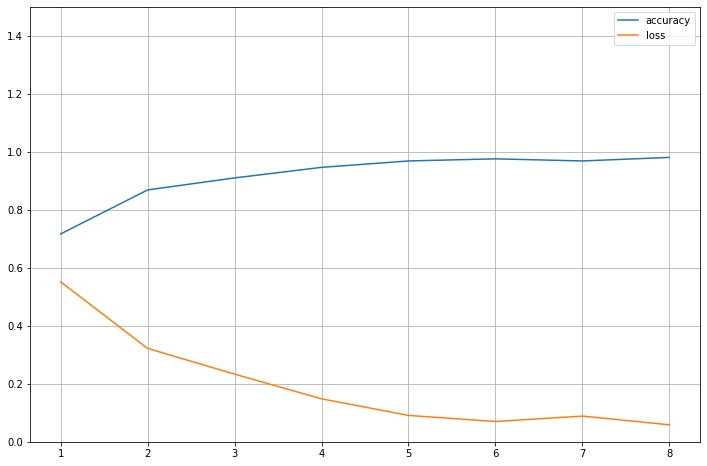

In [203]:
y_acc2 = hist1.history['accuracy']
y_loss2 = hist1.history['loss']
xs2 = np.arange(1, len(y_acc2) + 1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs2, y_acc2, label='accuracy')
plt.plot(xs2, y_loss2, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()